In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use("science")
import numpy as np

from neutrons.process.data_processor import TotalProcessor, AbsorptionProcessor


H_data_a = pd.read_csv('../data/h_cross_a.txt',sep='\s+')
H_data_t = pd.read_csv('../data/h_cross_t.txt',sep='\s+')
H_data_s = pd.read_csv('../data/h_cross_s.txt',sep='\s+')

O_data_a = pd.read_csv('../data/o_cross_a.txt',sep='\s+')
O_data_t = pd.read_csv('../data/o_cross_t.txt',sep='\s+')
O_data_s = pd.read_csv('../data/o_cross_s.txt',sep='\s+')

/tmp/ipykernel_38129/3083798119.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
processor = TotalProcessor([H_data_t, O_data_t])
f = processor.interpolaters[0]

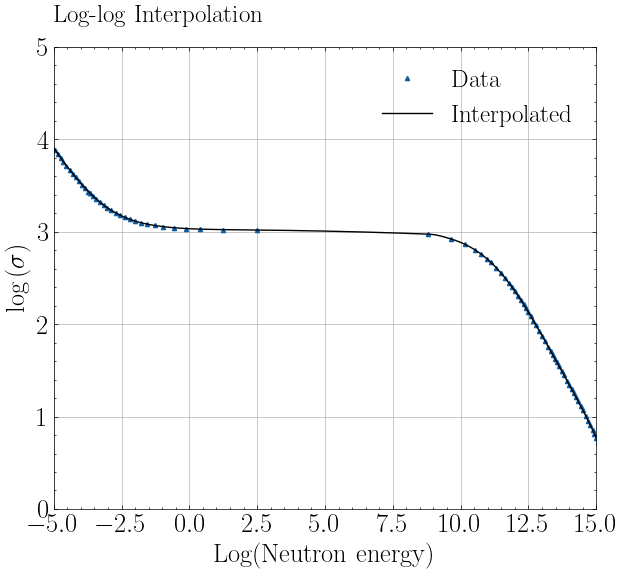

In [10]:
xp = H_data_t["energy(eV)"].values
fp = H_data_t["sigma_t(b)"].values

x_log = np.log(xp)
y_log = np.log(fp)

x_interp = np.linspace(min(x_log), max(x_log), 10000)
y_interp = f(x_interp)

plt.figure(figsize=(7, 6))
plt.plot(x_log, y_log, '^',markersize = 3, label="Data")
plt.plot(x_interp, y_interp, 'k-', label="Interpolated")
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.xlabel('Log(Neutron energy)', fontsize=19)
plt.ylabel(r'$\log{(\sigma)}$', fontsize=19)
plt.legend(fontsize=18)
plt.title('Log-log Interpolation', fontsize=18, pad=18, loc = 'left')
plt.xlim(-5, 15)
plt.ylim(0, 5)
plt.grid(True)
plt.show()

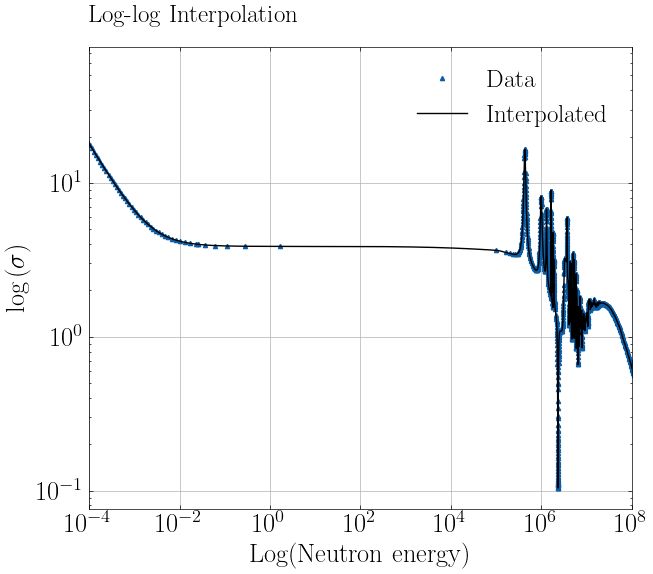

In [11]:
xp = O_data_t["energy(eV)"].values
fp = O_data_t["sigma_t(b)"].values

x_log = np.log(xp)
y_log = np.log(fp)

f = processor.interpolaters[1]
x_interp = np.linspace(min(x_log), max(x_log), 10000000)
y_interp_log = f(x_interp)
y_interp = np.exp(y_interp_log)

plt.figure(figsize=(7, 6))
plt.loglog(xp, fp, '^', markersize=3, label="Data")
plt.loglog(np.exp(x_interp), y_interp, 'k-', label="Interpolated")
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.xlabel('Log(Neutron energy)', fontsize=19)
plt.ylabel(r'$\log{(\sigma)}$', fontsize=19)
plt.xlim(10**-4, 10**8)
plt.legend(fontsize=18)
plt.title('Log-log Interpolation', fontsize=18, pad=18, loc = 'left')
plt.grid(True)
plt.show()

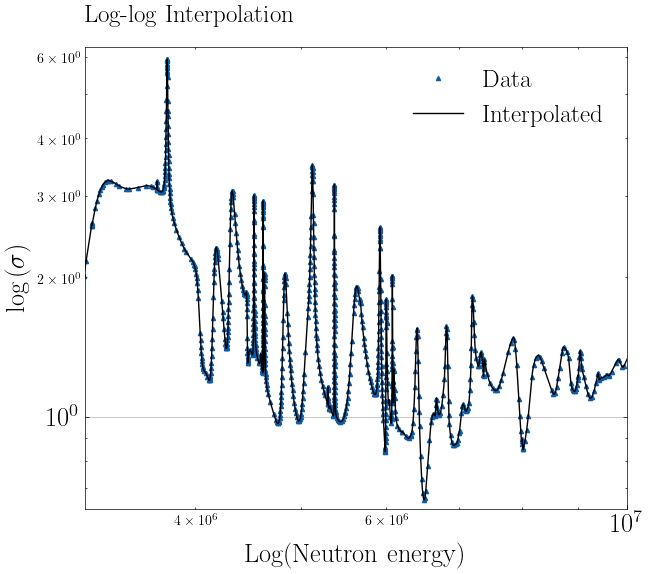

In [12]:
plt.figure(figsize=(7, 6))
plt.loglog(xp, fp, '^', markersize=3, label="Data")
plt.loglog(np.exp(x_interp), y_interp, 'k-', label="Interpolated")
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.xlabel('Log(Neutron energy)', fontsize=19)
plt.ylabel(r'$\log{(\sigma)}$', fontsize=19)
plt.legend(fontsize=18)
plt.xlim(10**6.5, 10**7)
plt.ylim(10**-0.2, 10**0.8)
plt.title('Log-log Interpolation', fontsize=18, pad=18, loc = 'left')
plt.grid(True)
plt.show()

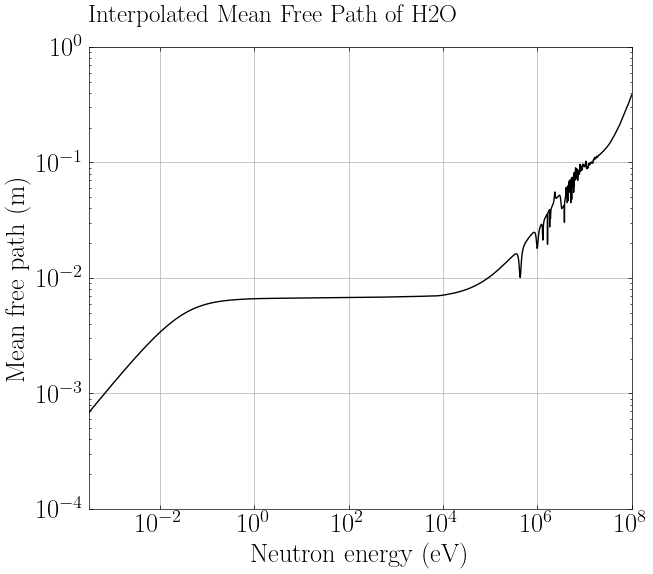

In [13]:
energies = np.logspace(-4, 8, 100000)
mfps=[processor.get_mfp(E) for E in energies]
plt.figure(figsize=(7, 6))
plt.loglog(energies, mfps, 'k-')
plt.xlim(10**-3.5, 10**8)
plt.ylim(10**-4, 1)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.xlabel('Neutron energy (eV)', fontsize=19)
plt.ylabel('Mean free path (m)', fontsize=19)
plt.title('Interpolated Mean Free Path of H2O', fontsize=18, pad=18, loc = 'left')
plt.grid(True)
plt.show()

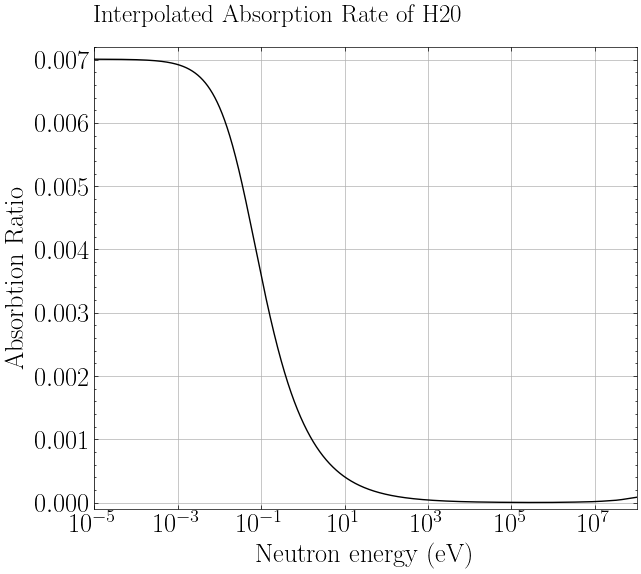

In [7]:
processor = AbsorptionProcessor([H_data_s, O_data_s], [H_data_a, O_data_a])
energies = np.logspace(-6, 10, 100000)
absorption_rates =[processor.get_absorption_rate(E) for E in energies]
plt.figure(figsize=(7, 6))
plt.plot(energies, absorption_rates, 'k-')
plt.xscale("log")
plt.xlim(10**-5, 10**8)
plt.ylim(-0.0001, 0.0072)
plt.yticks(fontsize=19)
plt.xticks(fontsize=19)
plt.xlabel('Neutron energy (eV)', fontsize=19)
plt.ylabel('Absorbtion Ratio', fontsize=19)
plt.title('Interpolated Absorption Rate of H20', fontsize=18, pad=18, loc = 'left')
plt.grid(True)
plt.show()